In [1]:
import numpy as np
import cv2
import glob
import os
from skimage import io, data
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time

In [2]:
import camera_calibration
import lane_detection
import vanishing_point
import utilities
import perspective_transform

In [3]:
ret, mtx, dist, rvecs, tvecs = camera_calibration.calibrate(False)

In [4]:
def get_distance(img_name, query_pnt, debug):
    
    img_BGR = cv2.imread(img_name)
    
    ud_img_BGR = cv2.undistort(img_BGR, mtx, dist, None, mtx)
    ud_img_RGB = cv2.cvtColor(ud_img_BGR, cv2.COLOR_BGR2RGB)
    
    if(debug):
        # original image
        utilities.show_images([ud_img_RGB])
    
    detector = lane_detection.LaneDetector()
    lines = detector.process(ud_img_RGB, True, 0.16, debug)
    
    vp = vanishing_point.calculate_vanishing_point(lines, ud_img_BGR, debug)
    
    H, H_inv, warped = perspective_transform.perspective_transform(vp, ud_img_BGR, debug)
    
    
    x_pixels_per_meter , y_pixels_per_meter, left_low, left_high, right_low, right_high = \
                    perspective_transform.get_ratio(H, H_inv, warped, mtx, debug)
    
    center = [img_BGR.shape[1]//2, img_BGR.shape[0]-1]
    distance = perspective_transform.get_distance(query_pnt, center, H, x_pixels_per_meter, y_pixels_per_meter)
    
    # image with lanes
    ud_img_BGR_with_lanes = np.array(ud_img_BGR)
    cv2.line(ud_img_BGR_with_lanes,(left_low[0], left_low[1]),(left_high[0], left_high[1]),(0,0,255),2)
    cv2.line(ud_img_BGR_with_lanes,(right_low[0], right_low[1]),(right_high[0], right_high[1]),(0,0,255),2)

    # distance
    return distance, ud_img_BGR_with_lanes

took 0.03789830207824707 seconds


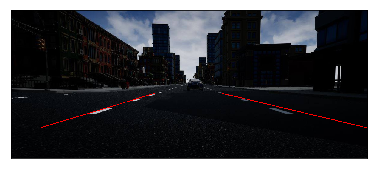

5.6005352206140495


In [14]:
img_name = 'x13.jpg'
query_pnt = [80, 80]

t1 = time.time()
distance, ud_img_BGR_with_lanes = get_distance(img_name, query_pnt, False)
t2 = time.time()

print("took " + str(t2-t1) + " seconds")

utilities.show_images([cv2.cvtColor(ud_img_BGR_with_lanes, cv2.COLOR_BGR2RGB)])
print(distance)